In [111]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import datetime as datetime
import nltk
import seaborn
import csv
from bs4 import BeautifulSoup
from sklearn import datasets, linear_model
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# stock price process

### convert string variable into float variable and calculate two new variable

In [184]:
def my_fun1(a,b):
    return float(a) - float(b) 

def my_fun2(a):
    return float(a)

MarketData = pd.read_csv('Stock_Price.csv')[2:]
MarketData
MarketData['HighMinusLow'] = MarketData.apply(lambda x: my_fun1(x['High'],x['Low']),axis=1)
MarketData['CloseMinusOpen'] = MarketData.apply(lambda x: my_fun1(x['Adj Close'],x['Open']),axis=1)
MarketData['High'] = MarketData.apply(lambda x: my_fun2(x['High']),axis=1)
MarketData['Low'] = MarketData.apply(lambda x: my_fun2(x['Low']),axis=1)
MarketData['Open'] = MarketData.apply(lambda x: my_fun2(x['Open']),axis=1)
MarketData['Adj Close'] = MarketData.apply(lambda x: my_fun2(x['Adj Close']),axis=1)
MarketData
#MarketData.plot()

,Attributes,High,Low,Open,Close,Volume,Adj Close,HighMinusLow,CloseMinusOpen
2,2016-09-26,2158.540039,2145.040039,2158.540039,2146.10009765625,3216170000,2146.100098,13.500000,-12.439941
3,2016-09-27,2161.129883,2141.550049,2146.040039,2159.929931640625,3437770000,2159.929932,19.579834,13.889893
4,2016-09-28,2172.399902,2151.790039,2161.850098,2171.3701171875,3891460000,2171.370117,20.609863,9.520020
5,2016-09-29,2172.669922,2145.199951,2168.899902,2151.1298828125,4249220000,2151.129883,27.469971,-17.770020
6,2016-09-30,2175.300049,2156.510010,2156.510010,2168.27001953125,4173340000,2168.270020,18.790039,11.760010
7,2016-10-03,2164.409912,2154.770020,2164.330078,2161.199951171875,3137550000,2161.199951,9.639893,-3.130127
8,2016-10-04,2165.459961,2144.010010,2163.370117,2150.489990234375,3750890000,2150.489990,21.449951,-12.880127
9,2016-10-05,2163.949951,2155.149902,2155.149902,2159.72998046875,3906550000,2159.729980,8.800049,4.580078
10,2016-10-06,2162.929932,2150.280029,2158.219971,2160.77001953125,3461550000,2160.770020,12.649902,2.550049
11,2016-10-07,2165.860107,2144.850098,2164.189941,2153.739990234375,3619890000,2153.739990,21.010010,-10.449951


### mean of stock data 

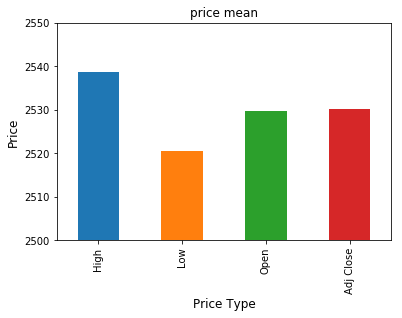

In [208]:
Market_Mean = MarketData.mean(axis=0)
Market_Mean_1 = Market_Mean[0:4]
ax = Market_Mean_1.plot(title='price mean', kind='bar')
ax.set_xlabel("Price Type",fontsize=12)
ax.set_ylabel("Price",fontsize=12)
plt.ylim(2500, 2550)
plt.show()